# AULA 01

##<h2>Python, Pandas e Phamacia</h2>

<p align='justify'>Primeiramente temos aqui a chamada do dataframe utilizado na aula através de um link de um repositório no GITHUB, de forma que o dataframe ficará disponível enquanto o arquivo estiver no git. </p>

In [1]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [2]:
dados.shape

(23814, 877)

In [3]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [4]:
dados['tempo'].unique()

array([24, 72, 48])

In [5]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [6]:
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [7]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [8]:
lista = [1,2,3,4]
lista[0]

1

In [9]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [10]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

##Desafio 01

Investigar por que a classe tratamento é tão desbalanceada.

Primeiramente vamos ver o tamanho das amostras com droga e de controle.

In [11]:
print(dados.groupby(['tratamento']).size())
print(dados['tratamento'].value_counts(normalize=True))

tratamento
com_controle     1866
com_droga       21948
dtype: int64
com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64


Aqui vemos que temos certca de 8% das amostras que são apenas controle. Vamos investigar agora a colune 'id'.

In [12]:
dados['id'].value_counts()

id_c356475d2    1
id_fc5a449ec    1
id_1a2aabd78    1
id_990d8372f    1
id_3d03b67a9    1
               ..
id_605c8b797    1
id_20ef993fb    1
id_8d4d72a3c    1
id_e66cee11b    1
id_b49a73a4a    1
Name: id, Length: 23814, dtype: int64

Vamos que a coluna ID foi utilizada para identificar cada amostra, pois ela tem o tamnho do número de linhas do dataframe, não tendo outro significado. Vamos ver as doses.

In [13]:
dados.groupby(['dose']).size()

dose
D1    12147
D2    11667
dtype: int64

Vemos aqui que há um numero praticamente igual no numero de doses D1 e D2, mas não haveria uma diferença quanto aos dados de controle?

In [14]:
dados_controle = dados[dados['tratamento']=='com_controle']
print(dados_controle.groupby(['dose']).size())
print(dados_controle.groupby(['tempo']).size())
print(dados_controle.groupby(['droga']).size())

dose
D1    951
D2    915
dtype: int64
tempo
24    606
48    648
72    612
dtype: int64
droga
cacb2b860    1866
dtype: int64


Vemos então que todos os dados de controle dizem a respeito de uma droga 'cacb2b860', que tem o mesmo significado de dados['tratamento']=='com_controle', e que foi dividido igualmente para as doses D1 e D2 e entre os tempos 24,48 e 72. Imagino que foi feito dessa forma para se diminuir o enviesamento dos dados. Investigando agora os dados com drogas.

In [15]:
dados_droga = dados[dados['tratamento']=='com_droga']
print(dados_droga.groupby(['dose']).size())
print(dados_droga.groupby(['tempo']).size())
print(dados_droga.groupby(['droga']).size())

dose
D1    11196
D2    10752
dtype: int64
tempo
24    7166
48    7602
72    7180
dtype: int64
droga
00199ff52     6
00251fc41     6
00321ea80    12
0034c0847     6
0060e686f     6
             ..
ff9565933     6
ffd66e220     6
ffe357f8f     1
ffed8e1c9     6
fff7d208d     6
Length: 3288, dtype: int64


Temos um número equilibrado entre doses e tempo, porém as drogas não. Vamos investigar mais.

In [16]:
dados_droga['droga'].value_counts()

87d714366    718
9f80f3f77    246
8b87a7a83    203
5628cb3ee    202
d08af5d4b    196
            ... 
58d311643      1
866e7bc56      1
bdeea739b      1
82dcdb180      1
4055d26a8      1
Name: droga, Length: 3288, dtype: int64

Aqui comprovamos que há drogas que foram aplicadas muito mais do que as outras, mas por que?

In [17]:
print(dados_droga[dados_droga['droga']=='87d714366'].groupby(['tempo']).size())
print(dados_droga[dados_droga['droga']=='87d714366'].groupby(['dose']).size())

tempo
24    235
48    247
72    236
dtype: int64
dose
D1    375
D2    343
dtype: int64


O número de doses e tempo continua equilibrado para cada droga, mas e para as drogas aplicadas apenas uma vez?

In [18]:
print(dados_droga[dados_droga['droga']=='f49a73cd5'].groupby(['tempo']).size())
print(dados_droga[dados_droga['droga']=='f49a73cd5'].groupby(['dose']).size())

tempo
48    1
dtype: int64
dose
D1    1
dtype: int64


Foram investigadas apenas para uma dose e um tempo.

##<h2> Desafio 02 </h2>
<p> Assim como com a função '.head()' a função '.tail()' 
tem como default imprimir as 5 últimas linhas, para mudar essa valor para menos ou mais linhas basta adicionar o número no argumento.

Por exemplo, para imprimir as últimas 10 linhas, usaria-se 'dados.tail(10)'.
</p>

In [19]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


##<h2> Desafio 03</h2>

<p> Como explicado na aula, a proporção é feita através do argumento 'normalize' na função '.value_counts()' que é um booleano que pode receber True ou False, sendo que em sua configuração default está em False.
</p>


In [20]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

##<h2> Desafio 04</h2>

<p> Para invesatigar o número de drogas, foi adotado a função '.describe()'
</p>

In [21]:
dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

Com esse resultado vemos todas as colunas que apresentam valores numéricos, ou seja, a coluna 'droga' que tem o nome das drogas utilizadas, não teremos informações estatísticas.

In [22]:
dados['droga'].describe()

count         23814
unique         3289
top       cacb2b860
freq           1866
Name: droga, dtype: object

Ao especificar a coluna, podemos obter algumas informações estatísticas. Como o número de drogas (unique), a quantidade de medidas (count), a droga mais utilizada (top) e sua frequência (1866), podemos checar essa informação através da formula abaixo.

In [23]:
(dados['droga']=='cacb2b860').value_counts()

False    21948
True      1866
Name: droga, dtype: int64

Fazendo o mesmo para toda a coluna de drogas podemos ver quais foram investigadas e qual frequência.

In [24]:
(dados['droga']).value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
58d311643       1
866e7bc56       1
bdeea739b       1
82dcdb180       1
4055d26a8       1
Name: droga, Length: 3289, dtype: int64

Aqui podemos ver que algumas drogas foram utilizadas apenas uma vez. Vamos investigar a droga 'f49a73cd5'.

In [25]:
dados[dados['droga']=='f49a73cd5']

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23006,id_f711197c3,com_droga,48,D1,f49a73cd5,-0.294,1.128,0.2505,0.144,-1.643,-0.468,-0.2932,-0.5903,0.4667,0.624,-0.279,0.6324,0.6317,-0.5868,0.783,0.2897,-0.4691,0.6587,-0.1197,-0.9782,0.1942,1.037,-1.334,0.0,-0.3199,-0.4537,1.051,0.5275,-0.0253,0.0067,-0.1214,-0.1804,0.2194,-0.6294,0.5606,...,-0.3039,0.0044,0.3698,0.162,0.3915,0.2038,0.6023,0.3072,-0.4233,-0.8304,-1.75,-0.144,0.778,0.3653,0.3707,-0.8305,0.5439,-0.3762,0.6196,-0.0892,0.3816,0.5535,-0.1799,0.3019,-0.3871,0.0549,0.3612,0.645,-0.9164,0.2251,-0.1169,-0.2416,-0.139,-0.0863,-0.1947,1.509,-0.7765,0.1564,-0.2462,-0.9312


##<h2>Desafio 06 </h2>
<p> As colunas da dataframe apresentado apresentam algumas inconsistênicas com relação ao que geralmente é exigido para se utilizar a biblioteca Pandas.
Isso se deve ao fato de que do jeito que está agora só poderíamos chamar as colunas nos formato string pois elas apresentam hífen (no caso as colunas de indíce 5 a 876). Para renomeá-las foi utilizado a linha de código abaixo.
</p>

In [26]:
dados.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [27]:
dados.columns = dados.columns.str.replace('-', "")

In [28]:
dados.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g0', 'g1', 'g2', 'g3',
       'g4',
       ...
       'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99'],
      dtype='object', length=877)

<p> Aqui vemos que os a função replace foi utilizadasnas colunas dos dados, que são valores em string, se forma a substituir o string '-' por uma string vazia "", assim 'g-0' se tornou 'g0'.

In [29]:
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


##<h2> Desafio 07 </h2>

<p> Para poder deixar os gráficos com mais informações, busca-se utilizar a biblioteca matplotlib, que pode ser chamada como abaixo.</p>

In [30]:
import matplotlib.pyplot as plt

Alguns métodos que podem ser realizados, estão abaixo aplicados a um grafíco de barras dos valores de controle e com drogas. Muitos métodos disponíveis em: https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

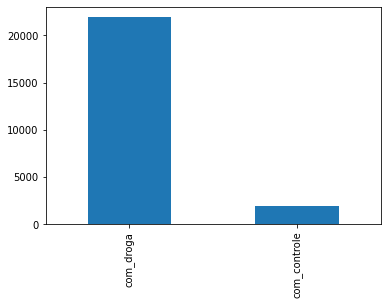

In [31]:
dados['tratamento'].value_counts().plot.bar()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

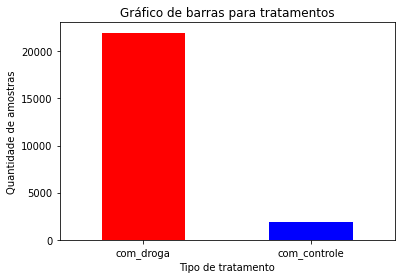

In [32]:
dados['tratamento'].value_counts().plot.bar(color=['red','blue'])
plt.title("Gráfico de barras para tratamentos")
plt.xlabel("Tipo de tratamento")
plt.ylabel("Quantidade de amostras")
plt.xticks(rotation=0, horizontalalignment="center")      

A seguir temos a solução de um colega @lucasbeja a um problema que tive ao add legendas

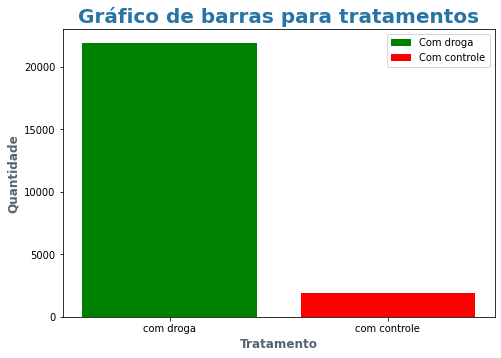

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_title("Gráfico de barras para tratamentos", fontweight="bold", color="#2874A6",fontsize=20)
ax.set_xlabel("Tratamento", fontweight="bold", fontsize="large", color="#566573")
ax.set_ylabel("Quantidade", fontweight="bold", color = "#566573", fontsize="large")


dados_trat = dados['tratamento'].value_counts()

a = dados_trat.loc['com_droga']
b = dados_trat.loc['com_controle']

ax.bar("com droga",a, label="Com droga", color="green")
ax.bar("com controle", b, label="Com controle", color="red") 

plt.legend()

##<h2>Desafio 05</h2>
<b>Método query</b>
<p>Realizado depois do desafio 7 para aproveitar a renomeação de colunas.
Vamos utilizar o método query para analisar os dados da droga mais aplicada.
Utilizado: 
https://medium.com/horadecodar/como-usar-o-query-do-pandas-fdf4a00727dc 
</p>

In [34]:
dados_droga = dados[dados['tratamento']=='com_droga']
dados_drogamais = dados_droga[dados_droga['droga']=='87d714366']
dados_drogamais.shape

(718, 877)

In [35]:
dados_drogamais.query('g0 > g1').shape

(714, 877)

Ou seja, aplicando o filtro de g0>g1, temos que dos 718 casos da droga, 714 obedecem a essa regra. Vamos realizar mais filtros.

In [36]:
(dados_drogamais.query('g0 > g1')).query('g0 > g2').shape

(687, 877)

Reduzimos ainda mais, vendo que, de todas as 718 aplicações da droga '87d714366', 714 tem g0>g1 e dessas 687 tem g0>g2.

##<h2> Desafio 08 </h2>
<p> Quando ao que foi descoberto aos dados, temos:
<li> Todos os casos com controle foram listados com a aplicação da droga 'cacb2b860' com dose D1 e D2 e tempos praticamente divididos igualiatariamente, imagino que foi feito dessa forma para que não houvesse enviasamento dos dados.</li>
<li> Com relação aos dados com droga, vemos que há drogtas que foram aplicados muito mais vezes, como a droga '87d714366' foi aplicada em mais de 700 amostras, e algumas droga que só foram aplicadas uma vez.</li>
<li>Para as drogas aplicadas apenas uma vez, tempos que os tempos e os tipos de doses não foram experimentadas de maneira balanceada.</li>
</p>

# AULA 02

##Estatísticas, visualização de dados e distribuições

In [37]:
dados

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.

Mudando a coluna drogas para 'compostos'

In [38]:
mapa={'droga':'composto'}
dados.rename(columns=mapa,inplace=True)
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Vamos lidar com outra biblioteca para criar gráficos, a SEABORN.

In [39]:
import seaborn as sns

Vamos criar um novo gráfico de barras para compostos.

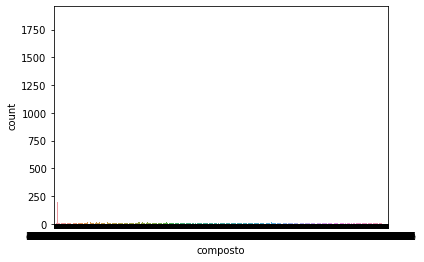

In [40]:
sns.countplot(data=dados,x='composto')

Obtemos um erro pois se trata de um dataframe muito grande, assim é inviável fazer um gráfico de barras da mesma forma que a anterior. Vamos ver apenas os 5 primeiros elementos.

In [41]:
compostos_selecionados = dados['composto'].value_counts().index[:5]
compostos_selecionados

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [42]:
#dados.query('composto in compostos_selecionados')

Deu erro falando que compostos_selecionados não foi definidos, para isso:

In [43]:
dados.query('composto in @compostos_selecionados')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775,0.4232,1.8460,-2.0940,0.1438,-0.6604,0.7243,0.0338,-0.0182,-0.2022,0.8827,

Para plotar o gráfico de barras, fazemos então:

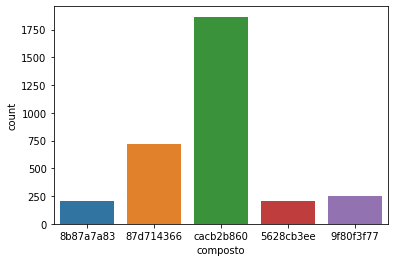

In [44]:
sns.countplot(data=dados.query('composto in @compostos_selecionados'),x='composto')

Vemos que o gráfico não está mais bonito que o matplotlib, para estilizar coloca-se:

In [45]:
sns.set()

Fazendo o gráfico de novo:

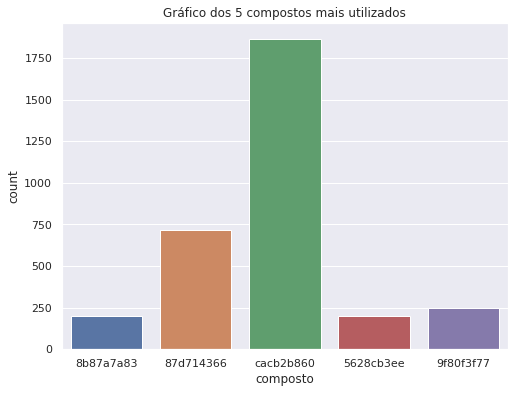

In [46]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=dados.query('composto in @compostos_selecionados'),x='composto')
ax.set_title("Gráfico dos 5 compostos mais utilizados")
plt.show()

Selecionando os elementos do g0.

In [47]:
len(dados['g0'].unique())

14367

Ou seja, dos 23814, temos 14367 elementos diferentes na coluna g0. Para poder analisar esses dados poderia-se criar intervalos para serem analisados.Valor analisar os valores.

In [48]:
print("valor mínimo de g0: " + str(dados['g0'].min()))
print("valor máximo de g0: " + str(dados['g0'].max()))

valor mínimo de g0: -5.513
valor máximo de g0: 10.0


A melhor forma é utilizando um histograma.

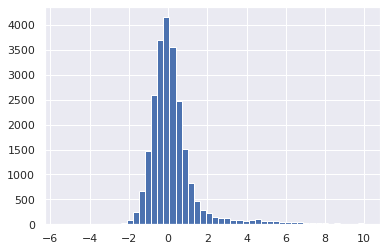

In [49]:
dados['g0'].hist(bins = 50)     #alterando bins para investigar

Aumentando o número de divisões percebemos que a distribuição de valores se aproxima de uma curva, que na Estatística, é chamada de <b>Curva de Distribuição Normal</b>.

Vamos plotar mais um gene para testar a sua distribuição.

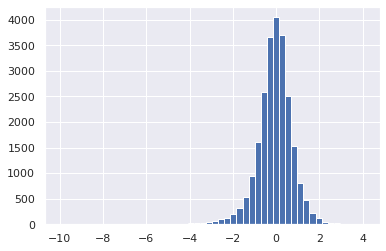

In [50]:
dados['g19'].hist(bins = 50)  

Analise dos dados utilizando a função describe()

In [51]:
dados.describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.

Para analisar apenas os genes (colunas gX), utilizamos:

In [52]:
dados.loc[:,'g0':'g771'].describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.508900,-0.533900

Transpondo a matriz e plotando apenas os valores de média e os valores de mínimo e máximo num histograma:

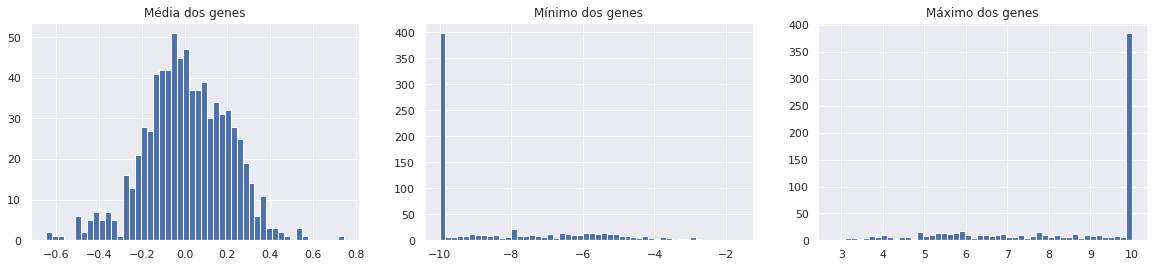

In [53]:
fig, ax =plt.subplots(1,3, figsize = ( 20 , 4 ))
dados.loc[:,'g0':'g771'].describe().T['mean'].hist(bins=50,ax=ax[0]).set_title("Média dos genes")
dados.loc[:,'g0':'g771'].describe().T['min'].hist(bins=50,ax=ax[1]).set_title("Mínimo dos genes")
dados.loc[:,'g0':'g771'].describe().T['max'].hist(bins=50,ax=ax[2]).set_title("Máximo dos genes")
fig.show()

Vamos investigar agora as colunas cX, que são tipos celulares.

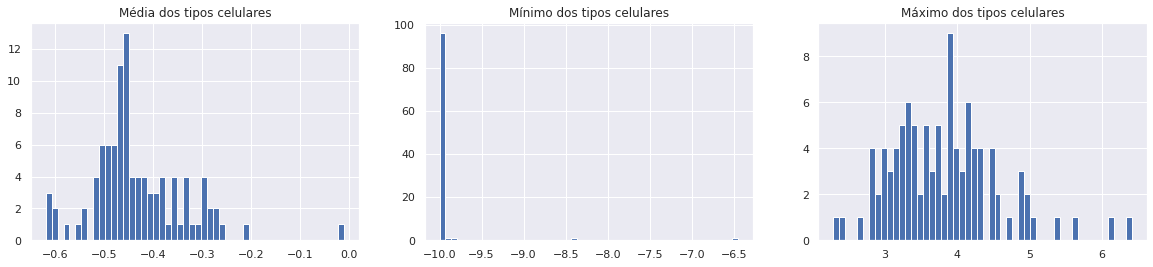

In [54]:
fig, ax =plt.subplots(1,3, figsize = ( 20 , 4 ))
dados.loc[:,'c0':'c99'].describe().T['mean'].hist(bins=50,ax=ax[0]).set_title("Média dos tipos celulares")
dados.loc[:,'c0':'c99'].describe().T['min'].hist(bins=50,ax=ax[1]).set_title("Mínimo dos tipos celulares")
dados.loc[:,'c0':'c99'].describe().T['max'].hist(bins=50,ax=ax[2]).set_title("Máximo dos tipos celulares")
fig.show()

Outra forma de investigar dados é através do BOXPLOT. Para o gene g0:

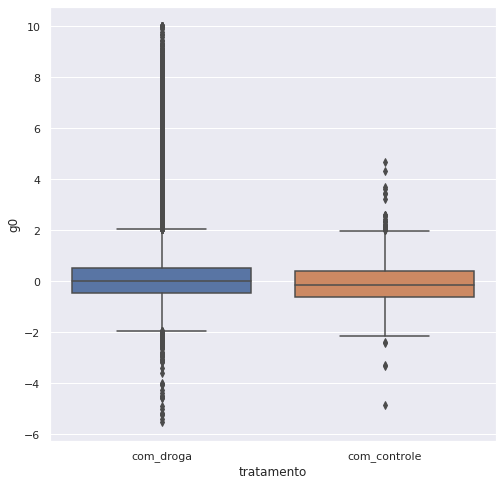

In [55]:
plt.figure(figsize=(8,8))
sns.boxplot(y='g0',x='tratamento', data=dados)

##Desafio 01
Ordenar os compostos em número de ocorrências no gráfico seaborn. 

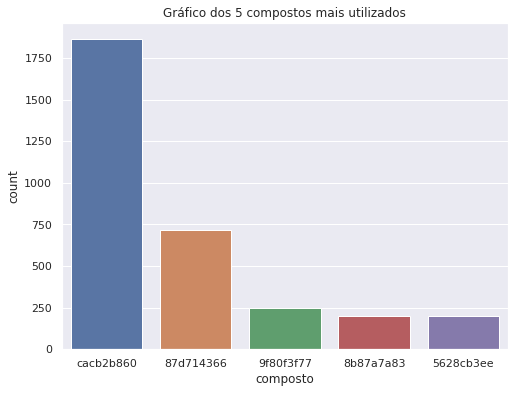

In [56]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=dados.query('composto in @compostos_selecionados'),
    x='composto',
    order=compostos_selecionados)
ax.set_title("Gráfico dos 5 compostos mais utilizados")
plt.show()

##Desafio 02
Estilizando o gráfico um pouco.

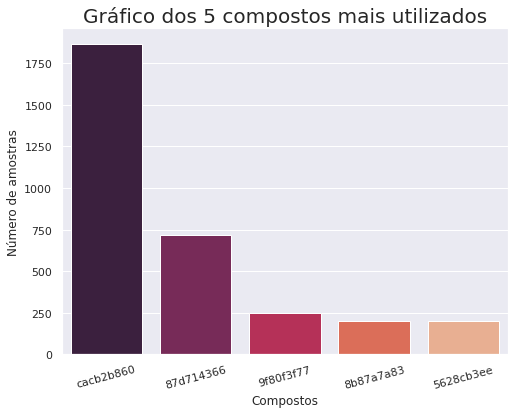

In [57]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=dados.query('composto in @compostos_selecionados'),        #utilização do query para relacionar a lista dos top5 com seus valores nos dados
    x='composto',                                                   
    order=compostos_selecionados,               #aqui ordenando os compostos segundo seu index na lista ordenada de ocorrências 
    palette="rocket")                           #utilização da palette de colors 'rocket', há muitas outas disponíveis na documentação
ax.set_title("Gráfico dos 5 compostos mais utilizados",fontsize=20)           #colocando título e alterando o tamanho
ax.set(xlabel="Compostos",ylabel="Número de amostras")           #set up dos eixos x e y
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)            #estilização do nome de cada composto, para ficar mais visível
plt.show()             #mostrando o gráfico montado de maneira mais limpa

##Desafio 03
Plotar os histogramas com seaborn

Plotando os quartis para os genes.

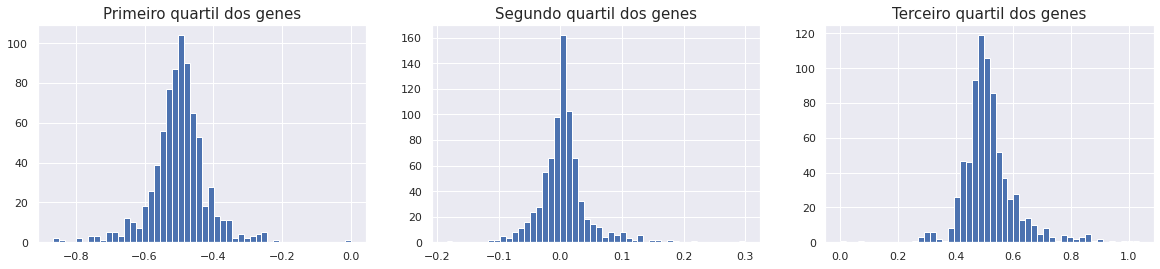

In [58]:
fig, ax =plt.subplots(1,3, figsize = ( 20 , 4 ))
dados.loc[:,'g0':'g771'].describe().T['25%'].hist(bins=50,ax=ax[0]).set_title("Primeiro quartil dos genes", fontsize=15)
dados.loc[:,'g0':'g771'].describe().T['50%'].hist(bins=50,ax=ax[1]).set_title("Segundo quartil dos genes", fontsize=15)
dados.loc[:,'g0':'g771'].describe().T['75%'].hist(bins=50,ax=ax[2]).set_title("Terceiro quartil dos genes", fontsize=15)
fig.show()

Plotando os quartis para os tipos celulares.

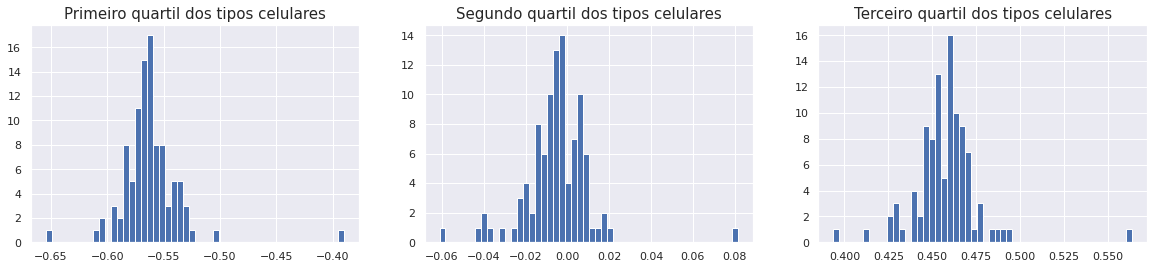

In [59]:
fig, ax =plt.subplots(1,3, figsize = ( 20 , 4 ))
dados.loc[:,'c0':'c99'].describe().T['25%'].hist(bins=50,ax=ax[0]).set_title("Primeiro quartil dos tipos celulares", fontsize=15)
dados.loc[:,'c0':'c99'].describe().T['50%'].hist(bins=50,ax=ax[1]).set_title("Segundo quartil dos tipos celulares", fontsize=15)
dados.loc[:,'c0':'c99'].describe().T['75%'].hist(bins=50,ax=ax[2]).set_title("Terceiro quartil dos tipos celulares", fontsize=15)
fig.show()

Vemos que os genes apresentam uma distribuição muito mais regular do que os tipos celulares.

##Desafio 04
Estudar estatísticas da função describe.

##Desafio 05
Refletir sobre a manipulação dos tamanho das visualizações

Analisando o box plot apresentado na aula, podemos ter varios tamanho, porém, o boxplot é geralmente apresentado como uma régua, ou seja, ele é mais bem visualizado com uma direção significativa. Para analisar apenas um parâmetro, seria melhor apresetá-lo na horizontal. Como abaixo, mas nota-se que no figsize, foi utilizado um tamanho que apresenta um maior comprimento do que altura:

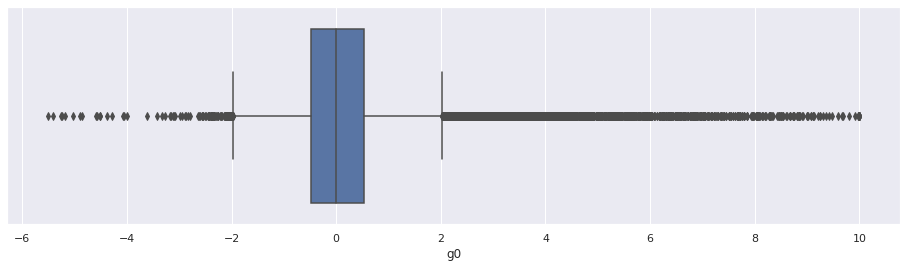

In [60]:
plt.figure(figsize=(16,4))
sns.boxplot(x='g0', data=dados)

Quanto maior o comprimento, melhor será vizualizado os outliers da distribuição de dados.

##Desafio 06
Fazer outras analises com o boxplot e até com o histograma.

Optei por analisar outro tipo de visualização de dados que fica entre um scatter plot e um box plot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


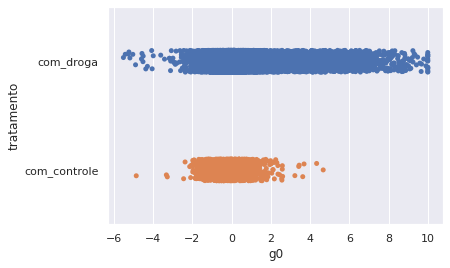

In [61]:
sns.stripplot(x='g0',y='tratamento', data=dados, split=True)

##Desafio 07

<p>Resumo da análises</p>
<li> Os dados referentes aos genes e aos tipos celulares apresentam uma distruição que seria comparada a distribuição normal</li>
<li> os genes apresentam uma distribuição muito mais regular do que os tipos celulares </li>


##Desafio EXTRA

Plotar gráficos da base de dados de COVID-19

fontes: 
<li>https://transparencia.registrocivil.org.br/especial-covid</li>
<li>https://brasil.io/dataset/covid19/caso/</li>

Pegando dados dos óbitos por COVID por mês desde o começo da pandemia.

In [62]:
import pandas as pd

#Disponível em:https://drive.google.com/file/d/13V8RMvaSNaSzQSflz_QmyC15Y8sap04d/view?usp=sharing

#dados_COVID = pd.read_csv('obito_cartorio.csv')
#dados_COVID.head()

In [64]:
#dados_COVID['state'].unique()

Temos dados das mortes por COVID em todos os estados.

In [65]:
#plt.figure(figsize=(20,4))
#sns.boxplot(data=dados_COVID, x ='new_deaths_total_2020')

# AULA 03

## Correlações, causalidade e relações entre genes.

Hoje vamos investigar um pouco sobre as correlações entre as colunas do dataframe. Vamos começar abrindo novamente nossos dados.

In [67]:
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Para conseguir ver, usaremos uma tabela de frequência que, para a biblioteca Pandas, utiliza-se o <b> crosstab</b>.

In [68]:
pd.crosstab(dados['dose'],dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


Relacionando as colunas tempo e dose, o método nos retorno uma contagem relacional, ou seja, é possível ver a quantidade de vezes que a dose D1 foi aplicada no tempo 24 etc. É possível ver que para o tempo 24, o número de doses D1 e D2 é balanceado, no entando, para 72 existem mais doses D1 e para 48 o desbalanceamento é ainda maior para as doses D1.

Porém, aqui ainda não está dividido entre as amostras que receberam ou não os compostos.

In [69]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Agora podemos ver, dentro das doses relacionadas com o tempo, a quantidade de amostras de controle e que receberam o composto (droga). Inicialmente, pode-se notal que com_controle temos uma valor que fica em torno de 305, com excessão de D1-48 e para com droga o valor fica em torno de 3585, com excessão para D1-48, novamente. Assim, já pode-se notar que há algo diferente nesse tipo de medida.

Vamos investigar os mesmos parâmetros normalizados pelo index, para investigar razão entre amostras com controle e com droga.

In [72]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'],normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Através da normalização, vemos que há um balanceamento constante entre amostras de controle e com droga que se mantém para todos os parâmetros investigados pelo experimento.

Vamos investigar para algum gene.

In [73]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], values=dados['g0'],aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Essa tabela mostra, por ex, que ao receber a dose D1 por um tempo 24, o gene g0 apresentou um valor médio de -0.251760.

Vamos analisar agora a relação entre g0 e g3.

In [75]:
dados[['g0','g3']].head()

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919


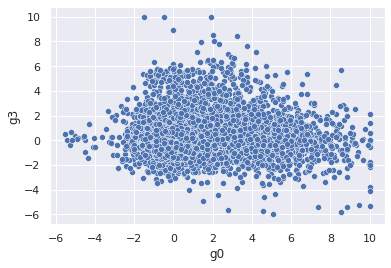

In [74]:
sns.scatterplot(x='g0',y='g3',data=dados)

Para esse dois parâmetros não enxerga-se nenhum padrão.

Analisando g0 e g8

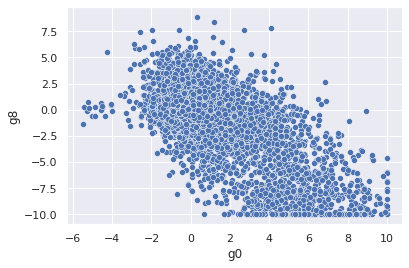

In [76]:
sns.scatterplot(x='g0',y='g8',data=dados)

Aqui já podemos ver que com o aumento de g0 temos diminuição de g8. Vamos ver melhor com uma linha de tendência.

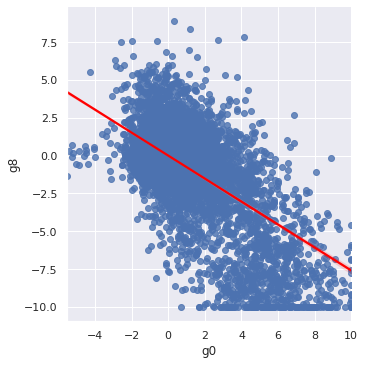

In [79]:
sns.lmplot(x='g0',y='g8',data=dados, line_kws={'color':'red'})

Porém, ainda estamos analisando um conjunto muito grande de dados que varia quanto a presença de droga, tempo de aplicação etc, para melhorar isso, vamos dividir quanto a tratamento:

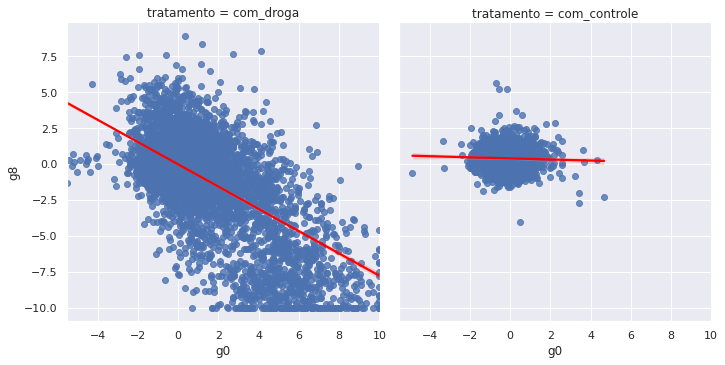

In [80]:
sns.lmplot(x='g0',y='g8',data=dados, line_kws={'color':'red'},col='tratamento')

Vemos uma diferença significativa quando a correlação dos genes quanto o tipo de tratamento. Vamos add uma analise de tempo.

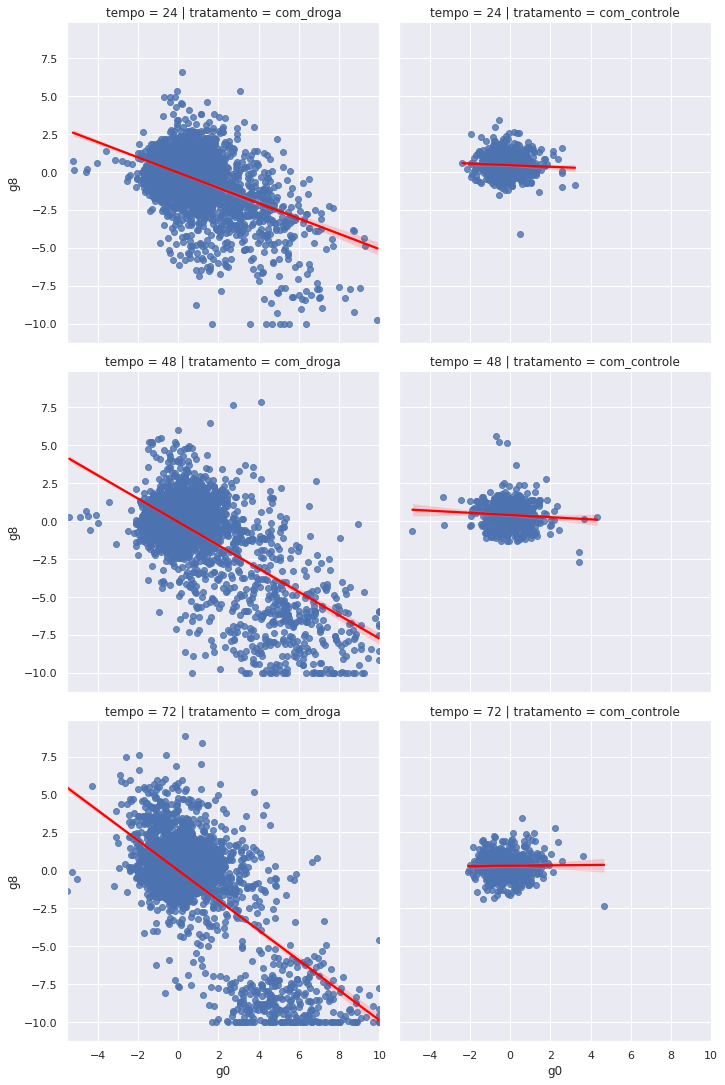

In [81]:
sns.lmplot(x='g0',y='g8',data=dados, line_kws={'color':'red'},col='tratamento', row='tempo')

Vemos que com o aumento do tempo, a inclinação dos dados com droga aumenta. Além da comprovação de que o grupo de controle se mantem sem alteração.

Podemos usar a correlação entre variáveis para se termos um indice numérico sobre.

In [82]:
dados.loc[:,'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0.000141,-0.172896,-0.324769,-0.291644,0.302912,0.222951,0.144028,-0.020950,0.129354,-

Aqui vemos uma tabela das correlações entre todos os genes. Quanto mais próximo de +1 ou -1, melhor a correlação.


Vamos ver graficamente.

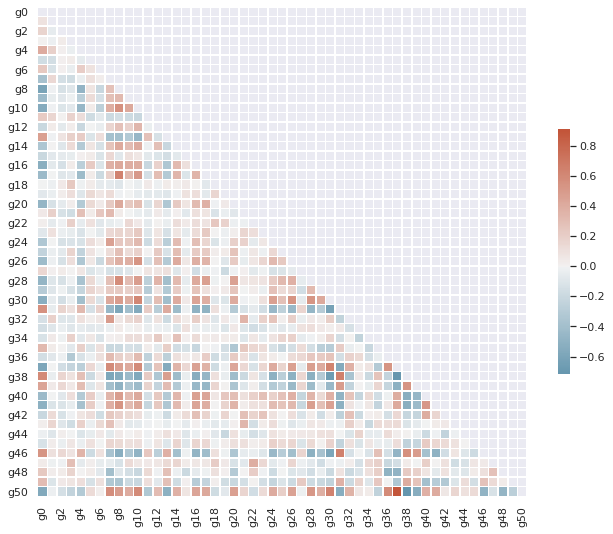

In [86]:
import numpy as np

corr = dados.loc[:,'g0':'g50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Vemos que na maioria, as relações são baixas, não havendo cores fortes. <b>Correlação não quer dizer causalidade. </b>

Investigando os tipos celulares.

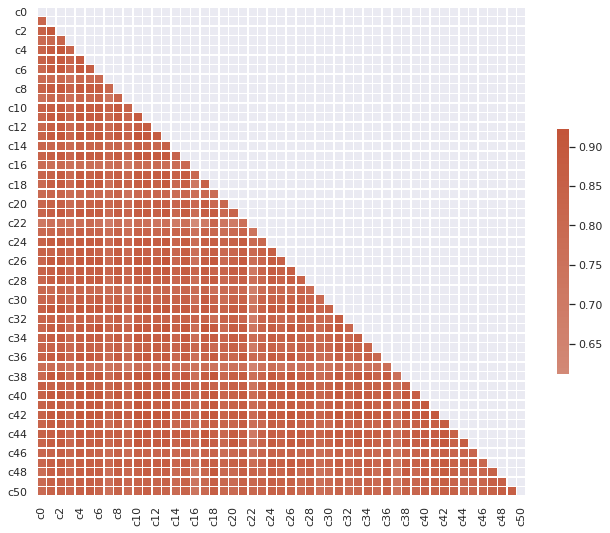

In [87]:
corr_celular = dados.loc[:,'c0':'c50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Vemos uma correlação muito alta e positiva em sua maioria. Lembrando que esses tipos celulares tem a ver com a sobrevivencia da celula com o tratamento. Os tipos celulares reagem de maneira semelhantes a aplicação do composto.

##Desafio 01

Contruir um crosstab através do método groupby.

Primeiro vamos analisar a tabela crosstab de referência.

In [99]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

A ferramenta groupby, da maneira mais simples, realiza a seguinte operação. Usar apenas o groupby cria um objeto pandas chamado de series. Um dataframe é composto de series.

In [92]:
dados.groupby('dose')

Para ver o número de elementos desse objeto, usa-se:

In [91]:
dados.groupby('dose').size()

dose
D1    12147
D2    11667
dtype: int64

Para selecionar, dentro dessas doses, os diferentes tempos e tratamentos, fazemos outro groupby:

In [97]:
dados.groupby(['dose','tempo','tratamento']).size()

dose  tempo  tratamento  
D1    24     com_controle     301
             com_droga       3585
      48     com_controle     343
             com_droga       4011
      72     com_controle     307
             com_droga       3600
D2    24     com_controle     305
             com_droga       3581
      48     com_controle     305
             com_droga       3591
      72     com_controle     305
             com_droga       3580
dtype: int64

##Desafio 02

Normalizar pela coluna da crosstab

No exemplo da aula, foi normalizado para cada linha, como mostrado abaixo:

In [100]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'],normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Para mudar isso deve-se alterar o parâmetro "normalize":

In [101]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'],normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

Aqui pode-se observar que temos um balanceamento igual que apenas muda para as amostras com D1 medidas com tempo 48, como já apontado anteriormente.

##Desafio 03

Explorar outros agregadores do crosstab (além da média).

Fonte: https://pbpython.com/pandas-crosstab.html

Pode-se utilizar a mediana:

In [103]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], values=dados['g0'],aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

E a variância:

In [106]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], values=dados['g0'],aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

Também temos a função soma:

In [107]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], values=dados['g0'],aggfunc='sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

E as funções de minimo e máximo:

In [108]:
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], values=dados['g0'],aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

Para aplicações de outras funções pode se utilizar o método apply


##Desafio 04

Explorar o melt

fonte: https://www.delftstack.com/pt/api/python-pandas/pandas-dataframe-dataframe.melt-function/

A função pandas.melt() funcionalidade reformula ou transforma um DataFrame existente. Ela muda a orientação do DataFrame de um formato amplo para um formato longo.

Aplicando para a primeira linha dos dados:

In [146]:
dados.head(1)

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.062,0.5577,-0.2479,-0.6208,-0.1944,-1.012,-1.022,-0.0326,0.5548,-0.0921,1.183,0.153,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.136,-1.188,0.694,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.301,-0.1537,...,0.4805,0.4965,0.368,0.8427,0.1042,0.1403,0.1758,1.257,-0.5979,1.225,-0.0553,0.7351,0.581,0.959,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.212,0.6362,-0.4427,0.1288,1.484,0.1799,0.5367,-0.1111,-1.012,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176


In [147]:
pd.melt(dados.head(1))

,variable,value
0,id,id_000644bb2
1,tratamento,com_droga
2,tempo,24
3,dose,D1
4,composto,b68db1d53
...,...,...
872,c95,0.6584
873,c96,-0.3981
874,c97,0.2139
875,c98,0.3801


Vemos que ao em vez de termos 1 amostra com 877 parâmetros, passamos a ter 877 variáveis que se relacionam a primeira amostra, aplicando para as duas primeiras amostras e fazendo outra operação:

In [148]:
dados.head(2)

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.183,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.152,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [149]:
pd.melt(dados.head(1), id_vars='id')

,id,variable,value
0,id_000644bb2,tratamento,com_droga
1,id_000644bb2,tempo,24
2,id_000644bb2,dose,D1
3,id_000644bb2,composto,b68db1d53
4,id_000644bb2,g0,1.062
...,...,...,...
871,id_000644bb2,c95,0.6584
872,id_000644bb2,c96,-0.3981
873,id_000644bb2,c97,0.2139
874,id_000644bb2,c98,0.3801


Vemos que obtemos uma tabela em que temos dois valores possíveis de id, com as variáveis sendo as outras colunas de 1 a 877 do dataframe e outra coluna com os valores dessas variáveis.

Melt transforma um DataFrame de um formato ‘wide’ para um formato ‘long’. Melt dá flexibilidade em como a transformação deveria ocorrer. Em outras palavras, melt permite pegar colunas e transformá-las em linhas enquanto deixa outras colunas intactas.

##Desafio 05

Analisar a correlação entre as expressões genicas e os tipos celulares.

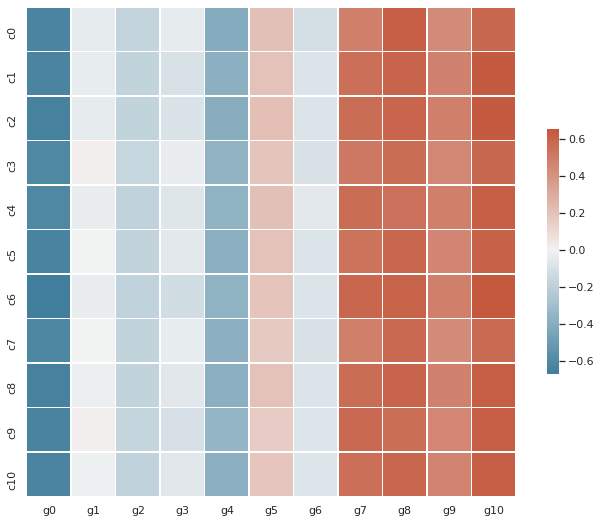

In [127]:
dados_corr = pd.concat([dados.loc[:,'g0':'g10'], dados.loc[:,'c0':'c10']], axis=1)  # axis significa que vc quer juntar pelas colunas
corr_cel_gen = dados_corr.corr().loc['c0':'c10','g0':'g10']

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cel_gen,  cmap=cmap, center=0,   
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    

Analisando apenas entre g0 a g10 e c0 a c10 vemos, por exemplo, que o gene 0 tem forte relação negativa com os tipos celulares e que os genes g7,g8,g9 e g10 tem forte relação positiva com todos os tipos celulares. Porém, os genes g1 a g6 não apresentam uma boa correlação.

##Desafio 06

Estudar o código da correlação (heatmap).

Analisando o código utilizado na aula e comentando:

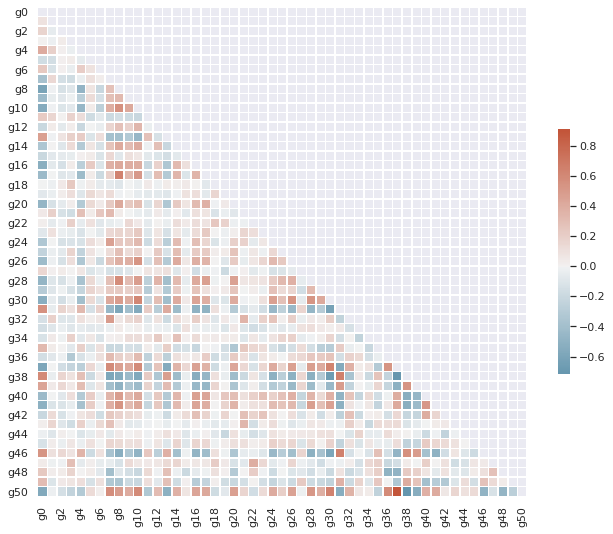

In [111]:
#Para esse cógido temos: import pandas as pd, import numpy as np e import matplotlib.pyplot as plt

corr = dados.loc[:,'g0':'g50'].corr()                                   ##  Aqui selecionamos as colunas a serem correlacionadas com o método pd.df.corr() 
                                                                        #será retornado uma lista com a correlação de cada coluna.

mask = np.triu(np.ones_like(corr, dtype=bool))                          ##  A função np.ones_like retorna um array que tenha o tempo tamanho da lista de 
                                                                        #correlações, o 'dtype==bool' substitui o tipo de dados do resultado. Já a função
                                                                        # np.triu retorna uma cópia do array com os elementos abaixo da diagona da posição 
                                                                        #do índice da linha do array zerados. essencialmente nessa linha de código o mask
                                                                        #cria um grid em que apenas serão add elementos do heatmap nas posições em que se
                                                                        #tem o valor TRUE, ou seja, posições em que existe correlação.

f, ax = plt.subplots(figsize=(11, 9))                                   ## Aqui apenas é passado o tamanho da figura final, é uma linha da bilbiotexca 
                                                                        #MatPlotLib.pyplot

cmap = sns.diverging_palette(230, 20, as_cmap=True)                     ## Aqui é apenas criado a paleta de cores do heatmap levando em conta dois valores
                                                                        #float que representam os tons de âncora para extensões negativas e positivas do 
                                                                        #mapa e o atributo 'as_map' que resgata 'matplotlib.colors.Colormap'

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,                       
            square=True, linewidths=.5, cbar_kws={"shrink": .5})        ##  Para a formação do heatmap passa-se o corr como parâmetro a ser plotado o mask 
                                                                        #para as posições, o cmap com relação as cores, 'center' apenas como valor em torno 
                                                                        #do qual será feita a escala, 'square' é apenas a estilização do gráfico, assim como
                                                                        #'linewidths', e por último, temos 'cbar_kws' que também pela uma opção de estilo da 
                                                                        #biblioteca do matplotlib

##Desafio 07

Resumo final.

<li> Algumas variáveis genéticas tem efeitos sobre os tipos celulares e outras não, como mostrado no heatmap obtido no desafio 5</li>
<li> Os dados da dose D1 estudados no tempo 48 apresentam alguma coisa difernte pois há uma maior quantidade de amostras </li>

#AULA 04